In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json
import csv
from requests import post
import numpy as np


In [69]:
steam_data =pd.read_csv(r"C:\Users\valdi\OneDrive\Documents\Springboard\steam.csv")
steam_data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [70]:
steam_data.shape

(27075, 18)

In [71]:
steam_data.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

The next step will be dropping data that is unneeded for the machine learning program
which are "required_age", "english", "achievements", "owners", "steamspy_tags",  and "price"
as these columns either do not reflect traits of trending games or are redundant. Although, appid is not vital for the machine learning program, but it is in order to merge the steamspy_tag_data.csv file   

In [72]:
steam_data=steam_data.drop(['english','required_age','achievements','owners','price','steamspy_tags' ], axis=1)
steam_data.columns

Index(['appid', 'name', 'release_date', 'developer', 'publisher', 'platforms',
       'categories', 'genres', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime'],
      dtype='object')

COLUMN DESCRIPTION:
name-tilte of the game
release_date- when the game was released
developer-developer of the game
publisher-publisher of the game
platforms- what platforms these games were on
categories- determines the type of game
genres- determines the sub-type of the game 
positive_ratings- ratings that reflect positve reviews of the game 
negative_ratings- rating that reflect negative reviews of the game
average_playtime- the average amount of time a player spent on the game
median_playtime- the midpoint of this dataset on playtime

In [73]:
steam_data.head()

,appid,name,release_date,developer,publisher,platforms,categories,genres,positive_ratings,negative_ratings,average_playtime,median_playtime
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,124534,3339,17612,317
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,3318,633,277,62
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,3416,398,187,34
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,1273,267,258,184
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,5250,288,624,415


In [74]:
steam_data.describe(include = 'all')

,appid,name,release_date,developer,publisher,platforms,categories,genres,positive_ratings,negative_ratings,average_playtime,median_playtime
count,2.707500e+04,27075,27075,27075,27075,27075,27075,27075,2.707500e+04,27075.000000,27075.000000,27075.00000
unique,NaN,27033,2619,17113,14354,7,3333,1552,NaN,NaN,NaN,NaN
top,NaN,Dark Matter,2018-07-13,Choice of Games,Big Fish Games,windows,Single-player,Action;Indie,NaN,NaN,NaN,NaN
freq,NaN,3,64,94,212,18398,6110,1852,NaN,NaN,NaN,NaN
mean,5.962035e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000559e+03,211.027147,149.804949,146.05603
std,2.508942e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.898872e+04,4284.938531,1827.038141,2353.88008
min,1.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.00000
25%,4.012300e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,2.000000,0.000000,0.00000
50%,5.990700e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+01,9.000000,0.000000,0.00000
75%,7.987600e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.260000e+02,42.000000,0.000000,0.00000


The reason why NaN seen so often in first few colmuns is due to the fact that 
columns "name", 'release_date;, 'devleoper', 'publisher', 'platforms', 'categories'
and 'genres' are considered to be categorical data. 

In [75]:
steam_dtype= steam_data.dtypes
print(steam_dtype)

appid                int64
name                object
release_date        object
developer           object
publisher           object
platforms           object
categories          object
genres              object
positive_ratings     int64
negative_ratings     int64
average_playtime     int64
median_playtime      int64
dtype: object


In [76]:
steam_nunique= steam_data.nunique()
print(steam_nunique)
#This is done so the output may reflect on how the data was measured as well as noticing which colmuns may have
#repeating/missing rows

appid               27075
name                27033
release_date         2619
developer           17113
publisher           14354
platforms               7
categories           3333
genres               1552
positive_ratings     2800
negative_ratings     1492
average_playtime     1345
median_playtime      1312
dtype: int64


In [77]:
steam_data.isnull().sum()

appid               0
name                0
release_date        0
developer           0
publisher           0
platforms           0
categories          0
genres              0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
dtype: int64

In [78]:
duplicate=steam_data[steam_data.duplicated()]
print(duplicate)
#An empty dataframe is produced, meaning that there are no values in this dataframe, therfore it is dafe to conclude there are 
#no duplicated values

Empty DataFrame
Columns: [appid, name, release_date, developer, publisher, platforms, categories, genres, positive_ratings, negative_ratings, average_playtime, median_playtime]
Index: []


In [79]:
print(steam_data.positive_ratings)

0        124534
1          3318
2          3416
3          1273
4          5250
          ...  
27070         3
27071         8
27072         0
27073         2
27074         4
Name: positive_ratings, Length: 27075, dtype: int64


In [80]:
steam_data['genres'].unique()

array(['Action', 'Action;Free to Play', 'Action;Free to Play;Strategy',
       ...,
       'Action;Adventure;Indie;Massively Multiplayer;RPG;Strategy;Early Access',
       'Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy',
       'Casual;Free to Play;Massively Multiplayer;RPG;Early Access'],
      dtype=object)

In [81]:
df= steam_data['genres'].str.split(';', expand= True)


In [82]:
df_one=pd.get_dummies(df, prefix= " ", prefix_sep= " ")
df_one=df_one.sum()
filtered_df1= df_one[df_one> 1000]
print(filtered_df1)

  Action        11212
  Adventure      5256
  Casual         4373
  Indie          2623
  Adventure      4342
  Casual         4321
  Indie          8691
  Simulation     1230
  Casual         1376
  Indie          6141
  RPG            1408
  Simulation     1620
  Strategy       1665
  Indie          1633
  RPG            1163
  Strategy       1104
dtype: int64


In [83]:
steamspy_tag_data = pd.read_csv(r"steamspy_tag_data.csv")
steamspy_tag_data.head()

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
pd.get_dummies(steamspy_tag_data)

,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,1065230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29018,1065570,0,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
29019,1065650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29020,1066700,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
steamspy_tag_data.isnull().sum()

appid           0
1980s           0
1990s           0
2.5d            0
2d              0
               ..
world_war_i     0
world_war_ii    0
wrestling       0
zombies         0
e_sports        0
Length: 372, dtype: int64

In [86]:
duplicate_steamspy=steamspy_tag_data[steamspy_tag_data.duplicated()]
print(duplicate_steamspy)

Empty DataFrame
Columns: [appid, 1980s, 1990s, 2.5d, 2d, 2d_fighter, 360_video, 3d, 3d_platformer, 3d_vision, 4_player_local, 4x, 6dof, atv, abstract, action, action_rpg, action_adventure, addictive, adventure, agriculture, aliens, alternate_history, america, animation_&_modeling, anime, arcade, arena_shooter, artificial_intelligence, assassin, asynchronous_multiplayer, atmospheric, audio_production, bmx, base_building, baseball, based_on_a_novel, basketball, batman, battle_royale, beat_em_up, beautiful, benchmark, bikes, blood, board_game, bowling, building, bullet_hell, bullet_time, crpg, capitalism, card_game, cartoon, cartoony, casual, cats, character_action_game, character_customization, chess, choices_matter, choose_your_own_adventure, cinematic, city_builder, class_based, classic, clicker, co_op, co_op_campaign, cold_war, colorful, comedy, comic_book, competitive, conspiracy, controller, conversation, crafting, crime, crowdfunded, cult_classic, cute, cyberpunk, cycling, dark, da

In [87]:
steamspy_tag_data.columns

Index(['appid', '1980s', '1990s', '2.5d', '2d', '2d_fighter', '360_video',
       '3d', '3d_platformer', '3d_vision',
       ...
       'warhammer_40k', 'web_publishing', 'werewolves', 'western', 'word_game',
       'world_war_i', 'world_war_ii', 'wrestling', 'zombies', 'e_sports'],
      dtype='object', length=372)

In [88]:
merged_steamdata=steam_data.merge(steamspy_tag_data, how='right')
merged_steamdata.head(20)


,appid,name,release_date,developer,publisher,platforms,categories,genres,positive_ratings,negative_ratings,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,124534.0,3339.0,...,0,0,0,0,0,0,0,0,0,550
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,3318.0,633.0,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,3416.0,398.0,...,0,0,0,0,0,5,122,0,0,0
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,1273.0,267.0,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,5250.0,288.0,...,0,0,0,0,0,0,0,0,0,0
5,60,Ricochet,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,2758.0,684.0,...,0,0,0,0,0,0,0,0,0,0
6,70,Half-Life,1998-11-08,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,27755.0,1100.0,...,0,0,0,0,0,0,0,0,0,0
7,80,Counter-Strike: Condition Zero,2004-03-01,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,12120.0,1439.0,...,0,0,0,0,0,0,0,0,0,0
8,130,Half-Life: Blue Shift,2001-06-01,Gearbox Software,Valve,windows;mac;linux,Single-player,Action,3822.0,420.0,...,0,0,0,0,0,0,0,0,63,0
9,220,Half-Life 2,2004-11-16,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,67902.0,2419.0,...,0,0,0,0,0,0,0,0,607,0


In [89]:
merged_steamdata.describe(include='all')

,appid,name,release_date,developer,publisher,platforms,categories,genres,positive_ratings,negative_ratings,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
count,2.902200e+04,27075,27075,27075,27075,27075,27075,27075,2.707500e+04,27075.000000,...,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000,29022.000000
unique,NaN,27033,2619,17113,14354,7,3333,1552,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Dark Matter,2018-07-13,Choice of Games,Big Fish Games,windows,Single-player,Action;Indie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,64,94,212,18398,6110,1852,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.952577e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000559e+03,211.027147,...,0.134140,0.049962,0.017573,0.158742,0.023637,0.092034,0.761698,0.016470,3.314382,0.574426
std,2.521478e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.898872e+04,4284.938531,...,5.722873,1.335872,0.934081,7.371732,1.002216,5.736370,24.977839,0.892563,104.515689,56.920088
min,1.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.997825e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.994700e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+01,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.987275e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.260000e+02,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [90]:
merged_steamdata.columns

Index(['appid', 'name', 'release_date', 'developer', 'publisher', 'platforms',
       'categories', 'genres', 'positive_ratings', 'negative_ratings',
       ...
       'warhammer_40k', 'web_publishing', 'werewolves', 'western', 'word_game',
       'world_war_i', 'world_war_ii', 'wrestling', 'zombies', 'e_sports'],
      dtype='object', length=383)

In [91]:
for col in merged_steamdata.columns:
    print(col)

appid
name
release_date
developer
publisher
platforms
categories
genres
positive_ratings
negative_ratings
average_playtime
median_playtime
1980s
1990s
2.5d
2d
2d_fighter
360_video
3d
3d_platformer
3d_vision
4_player_local
4x
6dof
atv
abstract
action
action_rpg
action_adventure
addictive
adventure
agriculture
aliens
alternate_history
america
animation_&_modeling
anime
arcade
arena_shooter
artificial_intelligence
assassin
asynchronous_multiplayer
atmospheric
audio_production
bmx
base_building
baseball
based_on_a_novel
basketball
batman
battle_royale
beat_em_up
beautiful
benchmark
bikes
blood
board_game
bowling
building
bullet_hell
bullet_time
crpg
capitalism
card_game
cartoon
cartoony
casual
cats
character_action_game
character_customization
chess
choices_matter
choose_your_own_adventure
cinematic
city_builder
class_based
classic
clicker
co_op
co_op_campaign
cold_war
colorful
comedy
comic_book
competitive
conspiracy
controller
conversation
crafting
crime
crowdfunded
cult_classic
cute
cyb

In [92]:
merged_steamdata.isnull().sum()

appid              0
name            1947
release_date    1947
developer       1947
publisher       1947
                ... 
world_war_i        0
world_war_ii       0
wrestling          0
zombies            0
e_sports           0
Length: 383, dtype: int64

In [93]:
merged_steamdata.dropna()
merged_steamdata.shape    

(29022, 383)

In [94]:
merged_steamdata.reset_index(drop= True)

,appid,name,release_date,developer,publisher,platforms,categories,genres,positive_ratings,negative_ratings,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,124534.0,3339.0,...,0,0,0,0,0,0,0,0,0,550
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,3318.0,633.0,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,3416.0,398.0,...,0,0,0,0,0,5,122,0,0,0
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,1273.0,267.0,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,5250.0,288.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29017,1065230,Room of Pandora,2019-04-24,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29018,1065570,Cyber Gun,2019-04-23,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,8.0,1.0,...,0,0,0,0,0,0,0,0,0,0
29019,1065650,Super Star Blast,2019-04-24,EntwicklerX,EntwicklerX,windows,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
29020,1066700,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,Alawar Entertainment,windows;mac,Single-player;Steam Cloud,Adventure;Casual;Indie,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df2= merged_steamdata['categories'].str.split(';', expand= True)
df_two=pd.get_dummies(df, prefix= " ", prefix_sep= " ")
df_two= df_two.sum()
print(df_two)

  Accounting                  2
  Action                  11212
  Adventure                5256
  Animation & Modeling       66
  Audio Production           16
                          ...  
  Utilities                   1
  Web Publishing              1
  Video Production            1
  Web Publishing              1
  Game Development            1
Length: 195, dtype: int64


In [96]:
df_two.sort_values(ascending= False).head(10)


  Action       11212
  Indie         8691
  Indie         6141
  Adventure     5256
  Casual        4373
  Adventure     4342
  Casual        4321
  Indie         2623
  Strategy      1665
  Indie         1633
dtype: int64

In [97]:
filtered_df2=  df_two[df_two>1000]
filtered_df2.head()
filtered_df2.shape

(16,)

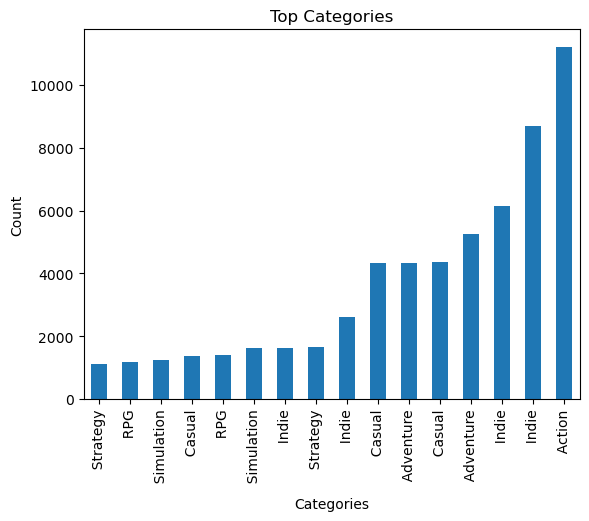

In [135]:
sorted_filtered=filtered_df2.sort_values()
graph_a=sorted_filtered.plot(kind= 'bar', title= 'Top Categories')
graph_a.set_xlabel('Categories')
graph_a.set_ylabel('Count')
plt.show()

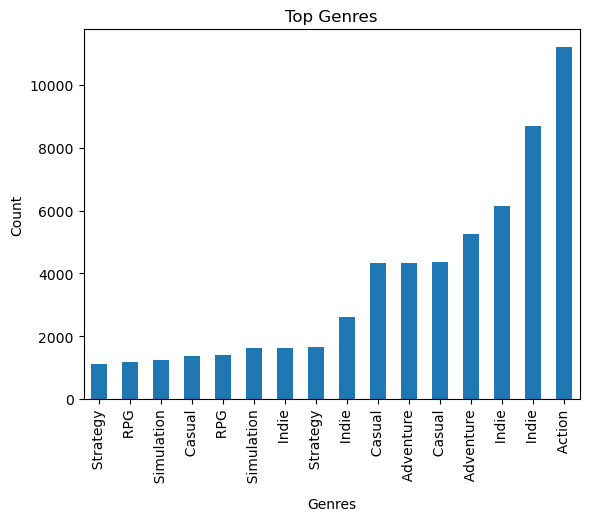

In [136]:
sorted_filtered1=filtered_df1.sort_values()
graph_b=sorted_filtered1.plot(kind='bar', title= 'Top Genres')
graph_b.set_xlabel('Genres')
graph_b.set_ylabel('Count')
plt.show()

In [101]:
print(filtered_df1.equals(filtered_df2))

True


Due to the identical disturbation among the Categories and Genres bar graphs, 
suggesting that the these two categories have the same data.
Cell 101 is designed to test that theorey and it appears that the data in these two columns indeeed do reflect having the same
data. This is indicated by the return statement of "True."


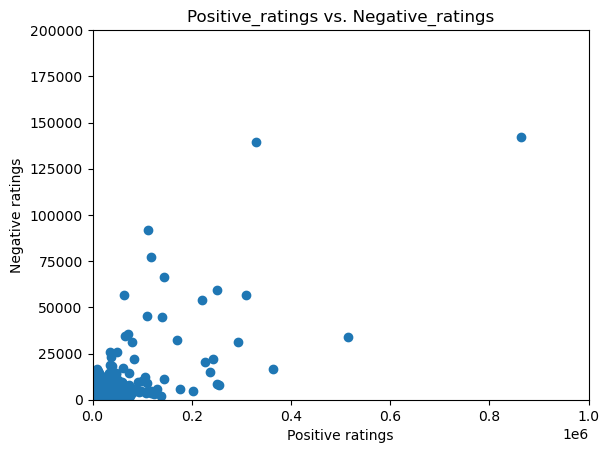

In [102]:
plt.scatter(data=merged_steamdata, x='positive_ratings', y='negative_ratings')
plt.xlim(0,1000000)
plt.ylim(0,200000)
plt.title('Positive_ratings vs. Negative_ratings')
plt.xlabel('Positive ratings')
plt.ylabel('Negative ratings')
plt.show()

This scatterplot represents the relationship between the positive ratings and negative ratings. the scatter plot suggests some king of correlation between the two different kinds of ratings

In [103]:
steam_corr= merged_steamdata[['genres','negative_ratings','positive_ratings',
'2d',
'2d_fighter',
'360_video',
'3d',
'3d_platformer',
'4_player_local',
'action',
'action_rpg',
'action_adventure',
'addictive',
'adventure',
'aliens',
'anime',
'arcade',
'arena_shooter',
'artificial_intelligence',
'assassin',
'asynchronous_multiplayer',
'base_building',
'baseball',
'basketball',
'batman',
'battle_royale',
'beat_em_up',
'blood',
'crpg',
'cartoon',
'casual',
'cats',
'character_action_game',
'character_customization',
'choices_matter',
'choose_your_own_adventure',
'cinematic',
'class_based',
'classic',
'co_op',
'co_op_campaign',
'cold_war',
'colorful',
'comedy',
'comic_book',
'competitive',
'conspiracy',
'controller',
'crime',
'cult_classic',
'cute',
'cyberpunk',
'dark',
'dark_comedy',
'dark_fantasy',
'dark_humor',
'demons',
'destruction',
'detective',
'difficult',
'dinosaurs',
'dog',
'dragons',
'drama',
'driving',
'dungeon_crawler',
'dungeons_&_dragons',
'dystopian_',
'education',
'emotional',
'epic',
'exploration',
'fmv',
'fps',
'family_friendly',
'fantasy',
'fast_paced',
'female_protagonist',
'fighting',
'first_person',
'fishing',
'flight',
'football',
'foreign',
'free_to_play',
'funny',
'futuristic',
'gambling',
'god_game',
'golf',
'gore',
'gothic',
'grand_strategy',
'great_soundtrack',
'grid_based_movement',
'hack_and_slash',
'hacking',
'heist',
'historical',
'hockey',
'horror',
'horses',
'hunting',
'indie',
'interactive_fiction',
'investigation',
'jrpg',
'lego',
'lara_croft',
'lemmings',
'level_editor',
'linear',
'local_co_op',
'local_multiplayer',
'logic',
'loot',
'lore_rich',
'mmorpg',
'moba',
'magic',
'martial_arts',
'massively_multiplayer',
'masterpiece',
'mature',
'mechs',
'medieval',
'military',
'minigames',
'minimalist',
'mining',
'mod',
'moddable',
'modern',
'motocross',
'motorbike',
'mouse_only',
'multiplayer',
'music',
'mystery',
'mystery_dungeon',
'mythology',
'nsfw',
'narration',
'naval',
'ninja',
'noir',
'nudity',
'old_school',
'online_co_op',
'open_world',
'parkour',
'parody_',
'party_based_rpg',
'physics',
'pinball',
'pirates',
'pixel_graphics',
'platformer',
'point_&_click',
'pool',
'post_apocalyptic',
'psychedelic',
'psychological',
'psychological_horror',
'puzzle',
'puzzle_platformer',
'pve',
'pvp',
'quick_time_events',
'rpg',
'rpgmaker',
'rts',
'racing',
'realistic',
'relaxing',
'remake',
'replay_value',
'retro',
'robots',
'rogue_like',
'romance',
'runner',
'sailing',
'sandbox',
'satire',
'sci_fi',
'science',
'score_attack',
'sequel',
'sexual_content',
'shoot_em_up',
'shooter',
'short',
'side_scroller',
'simulation',
'singleplayer',
'skateboarding',
'skating',
'skiing',
'sniper',
'snow',
'snowboarding',
'soccer',
'soundtrack',
'space',
'space_sim',
'spectacle_fighter',
'split_screen',
'sports',
'star_wars',
'stealth',
'steampunk',
'story_rich',
'strategy',
'strategy_rpg',
'superhero',
'supernatural',
'surreal',
'survival',
'survival_horror',
'swordplay',
'tactical',
'tactical_rpg',
'tanks',
'team_based',
'tennis',
'text_based',
'third_person',
'third_person_shooter',
'thriller',
'time_attack',
'time_manipulation',
'time_travel',
'top_down',
'top_down_shooter',
'tower_defense',
'trading_card_game',
'turn_based',
'turn_based_combat',
'turn_based_strategy',
'turn_based_tactics',
'twin_stick_shooter',
'underground',
'underwater',
'vr',
'vampire',
'villain_protagonist',
'violent',
'walking_simulator',
'war',
'wargame',
'warhammer_40k',
'werewolves',
'western',
'word_game', 
'world_war_i',
'world_war_ii',
'wrestling',
'zombies',
'e_sports']].dropna().corr()
print(steam_corr)

                  negative_ratings  positive_ratings        2d  2d_fighter  \
negative_ratings          1.000000          0.762804  0.021433    0.017192   
positive_ratings          0.762804          1.000000  0.111796    0.019508   
2d                        0.021433          0.111796  1.000000    0.084943   
2d_fighter                0.017192          0.019508  0.084943    1.000000   
360_video                -0.000573         -0.000644 -0.000986   -0.000442   
...                            ...               ...       ...         ...   
world_war_i               0.005308          0.008019  0.025301   -0.000573   
world_war_ii              0.060202          0.038388 -0.002262   -0.001086   
wrestling                 0.000548         -0.000317  0.002140   -0.000668   
zombies                   0.113279          0.133617  0.002906   -0.000907   
e_sports                  0.594705          0.873008 -0.000667    0.004407   

                  360_video        3d  3d_platformer  4_player_

The matrix above describes the correlation between each column from a range of -1 to 1. The cell below is designed to query any outstanding correlations. These outstanding correlations are the main focus of the heatmap due to the large amount of columns. 

In [137]:
corr_df = steam_corr.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
signi_corr= [c for c in tri_df.columns if any(tri_df[c] > 0.8)]
print(signi_corr)


['negative_ratings', 'positive_ratings', '2d', '2d_fighter', '4_player_local', 'action', 'action_rpg', 'action_adventure', 'addictive', 'adventure', 'aliens', 'anime', 'base_building', 'batman', 'cartoon', 'character_action_game', 'character_customization', 'choices_matter', 'class_based', 'co_op', 'comedy', 'comic_book', 'competitive', 'crime', 'cute', 'dark', 'dark_fantasy', 'detective', 'difficult', 'dragons', 'driving', 'education', 'emotional', 'epic', 'fps', 'fantasy', 'fast_paced', 'first_person', 'flight', 'football', 'funny', 'futuristic', 'gore', 'grand_strategy', 'great_soundtrack', 'horror', 'level_editor', 'local_multiplayer', 'moba', 'magic', 'mature', 'military', 'mod', 'moddable', 'motocross', 'multiplayer', 'mystery', 'narration', 'naval', 'online_co_op', 'open_world', 'pixel_graphics', 'post_apocalyptic', 'psychedelic', 'psychological_horror', 'pvp', 'rts', 'racing', 'realistic', 'sandbox', 'shooter', 'short', 'singleplayer', 'skiing', 'snow', 'soccer', 'split_screen'

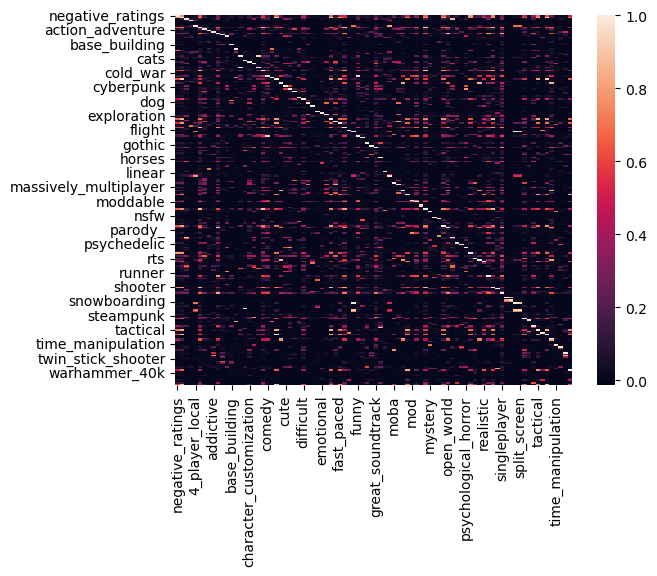

<Figure size 2e+10x1e+09 with 0 Axes>

In [138]:
signi_col=steam_corr[['negative_ratings', 'positive_ratings', '2d', '2d_fighter', '4_player_local', 'action', 'action_rpg', 'action_adventure', 'addictive', 'adventure', 'aliens', 'anime', 'base_building', 'batman', 'cartoon', 'character_action_game', 'character_customization', 'choices_matter', 'class_based', 'co_op', 'comedy', 'comic_book', 'competitive', 'crime', 'cute', 'dark', 'dark_fantasy', 'detective', 'difficult', 'dragons', 'driving', 'education', 'emotional', 'epic', 'fps', 'fantasy', 'fast_paced', 'first_person', 'flight', 'football', 'funny', 'futuristic', 'gore', 'grand_strategy', 'great_soundtrack', 'horror', 'level_editor', 'local_multiplayer', 'moba', 'magic', 'mature', 'military', 'mod', 'moddable', 'motocross', 'multiplayer', 'mystery', 'narration', 'naval', 'online_co_op', 'open_world', 'pixel_graphics', 'post_apocalyptic', 'psychedelic', 'psychological_horror', 'pvp', 'rts', 'racing', 'realistic', 'sandbox', 'shooter', 'short', 'singleplayer', 'skiing', 'snow', 'soccer', 'split_screen', 'strategy', 'strategy_rpg', 'survival', 'tactical', 'tanks', 'team_based', 'third_person', 'time_manipulation', 'top_down', 'turn_based', 'war']]
sns.heatmap(signi_col)
plt.figure(figsize=(200000000,10000000))
plt.show()

To summarize the purpose of this notebook is to start the early steps of creating a Machine Learning program designed to not only identify top trending games and generes but as well as future trends. The first step is collecting data from a reputaible source, as stated in the proposal this data orignates from steam. Once this step is performed, the data was grossly-analyzed. Just understanding, the type of data how many columns and rows, if there any missing or strange values, basic statistics, and/or how the data was recorded(binary or etc). The "genere" aspect of the data was converted to a binary system in order to make the data easier to manipulate. I have also added a new dataframe that consist of data that describes the amount of upvotes each genre of game which that table has been merged with the steam_data dataframe. In the next journal, this data will be used to create a histogram. The histogram will visualize least and most popular generes.